In [65]:
import pdb

In [2]:
import openslide
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load the WSI
wsi_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/TCGA-CRC/8472de58-9075-4534-b00b-3a87ba2158da/TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs'
wsi_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/TCGA-CRC/tcga_folder_1/TCGA-A8-A085-01Z-00-DX1.2B52D1B8-5AD4-4BD6-ADF7-9D65B8EE2622.svs'
wsi_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/TCGA-CRC/a72573a6-2462-4185-b4e8-a081c95d8fd7/TCGA-AA-3713-01Z-00-DX1.8148ACEB-7C1E-4D29-B908-F3729657EA4F.svs'

slide = openslide.OpenSlide(wsi_path)

# Load the indices from the .pkl file
pkl_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/Tissue/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pkl'
pkl_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/Tissue/tcga_folder_1.TCGA-A8-A085-01Z-00-DX1.2B52D1B8-5AD4-4BD6-ADF7-9D65B8EE2622.svs.pkl'
pkl_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/Tissue/a72573a6-2462-4185-b4e8-a081c95d8fd7.TCGA-AA-3713-01Z-00-DX1.8148ACEB-7C1E-4D29-B908-F3729657EA4F.svs.pkl'

with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

# Extract tissue and holes indices
tissue_indices = data.get('tissue', [])
holes_indices_list = data.get('holes', [])

# Convert indices to numpy arrays for easier manipulation
tissue_indices = np.array(tissue_indices)
# holes_indices_list = np.array(holes_indices)

# Define the level to visualize (usually level 0 is the highest resolution)
level = 0

# Get the dimensions of the WSI at the specified level
wsi_width, wsi_height = slide.level_dimensions[level]

# Create a blank image to visualize the segmentation
segmentation_image = np.zeros((wsi_height, wsi_width), dtype=np.uint8)

# Mark the segmented tissue in the blank image
for idx in tissue_indices[0]:
    idx = idx[-1]
    segmentation_image[idx[1], idx[0]] = 255  # Assuming indices are (x, y)

for holes_indices in holes_indices_list[0]:
    # Reshape the array to (num_rows, 2)
    holes_indices = holes_indices.reshape(-1, 2)
    for idx in holes_indices:
        segmentation_image[idx[1], idx[0]] = 0  # Assuming indices are (x, y)

# Display the WSI and the segmentation
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Display the WSI
wsi_image = slide.read_region((0, 0), level, (wsi_width, wsi_height))
ax[0].imshow(wsi_image)
ax[0].set_title('Whole Slide Image')

# Display the segmentation
ax[1].imshow(segmentation_image, cmap='gray', vmax=1)
ax[1].set_title('Tissue Segmentation')

plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

Text(0.5, 1.0, 'Problematic Whole Slide Image')

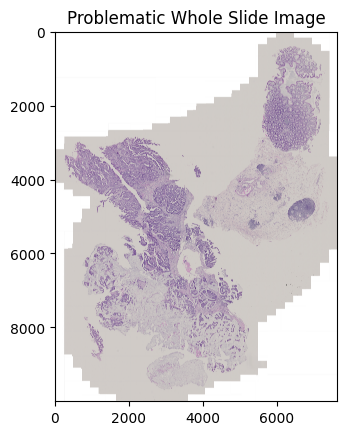

In [10]:
wsi_image = slide.read_region((0, 0), level, (wsi_width, wsi_height))
plt.imshow(wsi_image)
plt.title('Problematic Whole Slide Image')


In [58]:
idx = tissue_indices[0]# [0][-1]
idx[0][-1]

array([5105,  976], dtype=int32)

ROI coordinates: (496, 976), size: 2000x2000
Tissue pixels in ROI: 290
Hole pixels in ROI: 0


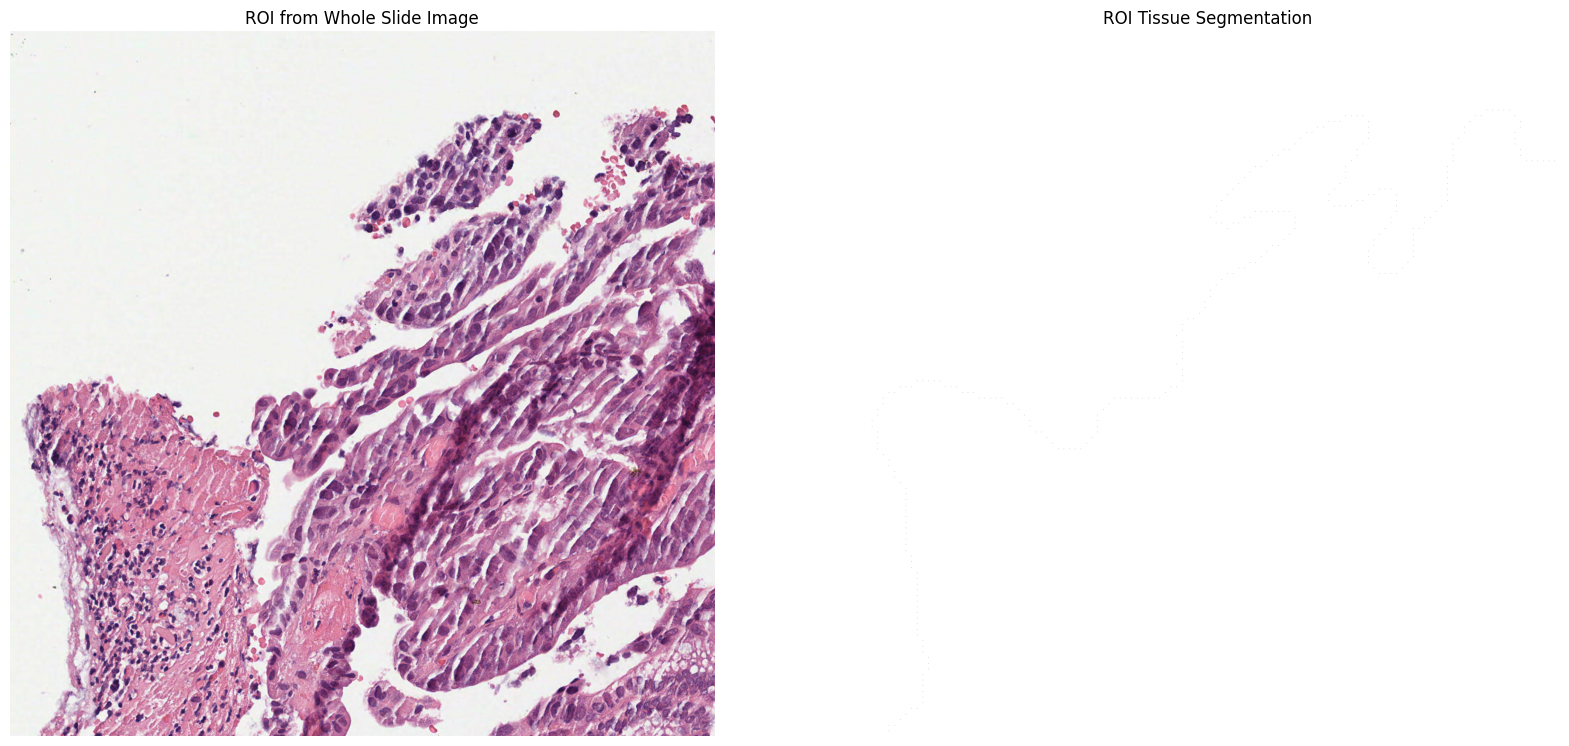

In [131]:
import openslide
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.colors import Normalize

# Load the WSI
wsi_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/TCGA-CRC/8472de58-9075-4534-b00b-3a87ba2158da/TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs'
slide = openslide.OpenSlide(wsi_path)

# Load the dictionary from the .pkl file
pkl_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/Tissue/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pkl'
with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

# Check if it's a NumPy array and extract the dictionary
if isinstance(data, np.ndarray) and data.shape == ():
    data = data.item()

# Extract tissue and holes indices
tissue_indices = data.get('tissue', [])[0]
holes_indices_list = data.get('holes', [])[0]

# Define the level to visualize (usually level 0 is the highest resolution)
level = 0

# Get the dimensions of the WSI at the specified level
wsi_width, wsi_height = slide.level_dimensions[level]

# Find the bounding box of the tissue
min_x = min(idx[-1][0] for idx in tissue_indices)
max_x = max(idx[-1][0] for idx in tissue_indices)
min_y = min(idx[-1][1] for idx in tissue_indices)
max_y = max(idx[-1][1] for idx in tissue_indices)

# Define a region of interest (ROI) based on the tissue bounding box
roi_width, roi_height = 2000, 2000
roi_x = max(0, min(min_x, wsi_width - roi_width))
roi_y = max(0, min(min_y, wsi_height - roi_height))

print(f"ROI coordinates: ({roi_x}, {roi_y}), size: {roi_width}x{roi_height}")

# Extract the ROI from the WSI
roi_image = slide.read_region((roi_x, roi_y), level, (roi_width, roi_height))
roi_image = np.array(roi_image)[:,:,:3]  # Convert to RGB numpy array

# Create a blank image for the ROI segmentation
roi_segmentation = np.ones((roi_height, roi_width), dtype=np.uint8) * 255

# Mark the segmented tissue in the ROI
tissue_count = 0
for idx in tissue_indices:
    idx = idx[-1]
    x, y = idx[0] - roi_x, idx[1] - roi_y
    if 0 <= x < roi_width and 0 <= y < roi_height:
        roi_segmentation[y, x] = 0
        tissue_count += 1

# Mark the holes in the ROI
hole_count = 0
for holes_indices in holes_indices_list:
    holes_indices = holes_indices.reshape(-1, 2)
    for idx in holes_indices:
        x, y = idx[0] - roi_x, idx[1] - roi_y
        if 0 <= x < roi_width and 0 <= y < roi_height:
            roi_segmentation[y, x] = 255
            hole_count += 1

print(f"Tissue pixels in ROI: {tissue_count}")
print(f"Hole pixels in ROI: {hole_count}")

# Display the ROI and its segmentation
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(roi_image)
ax[0].set_title('ROI from Whole Slide Image')
ax[0].axis('off')

ax[1].imshow(roi_segmentation, cmap='gray')
ax[1].set_title('ROI Tissue Segmentation')
ax[1].axis('off')

plt.show()


In [130]:
np.sum(roi_segmentation == 0)

290